Updated: 18/03/24

This workbook looks for the linear (2,0,n,+/-) 'memory' QNMs in the (l_min,0) spherical modes, in the nospin CCE waveforms. 

1) Check for linear modes in individual spherical modes
2) Do a mapping on the linear modes
3) Do a mapping on the quadratic m=0 modes [(2,2,0,1,2,-2,0,-1), (3,3,0,1,3,-3,0,-1)] for evidence of presence in the signal. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qnmfitsrd as qnmfits
from multiprocessing import Pool
from spatial_reconstruction import *
import matplotlib.pyplot as plt
from qnmfitsrd.CCE_file_getter import *

In [2]:
l_max = 8
n_max = 3

In [3]:
sim1 = CCE_to_sim_high_res(sim_num='0001')
sim2 = CCE_to_sim_high_res(sim_num='0010')

/tmp/ipykernel_18611/2201196235.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


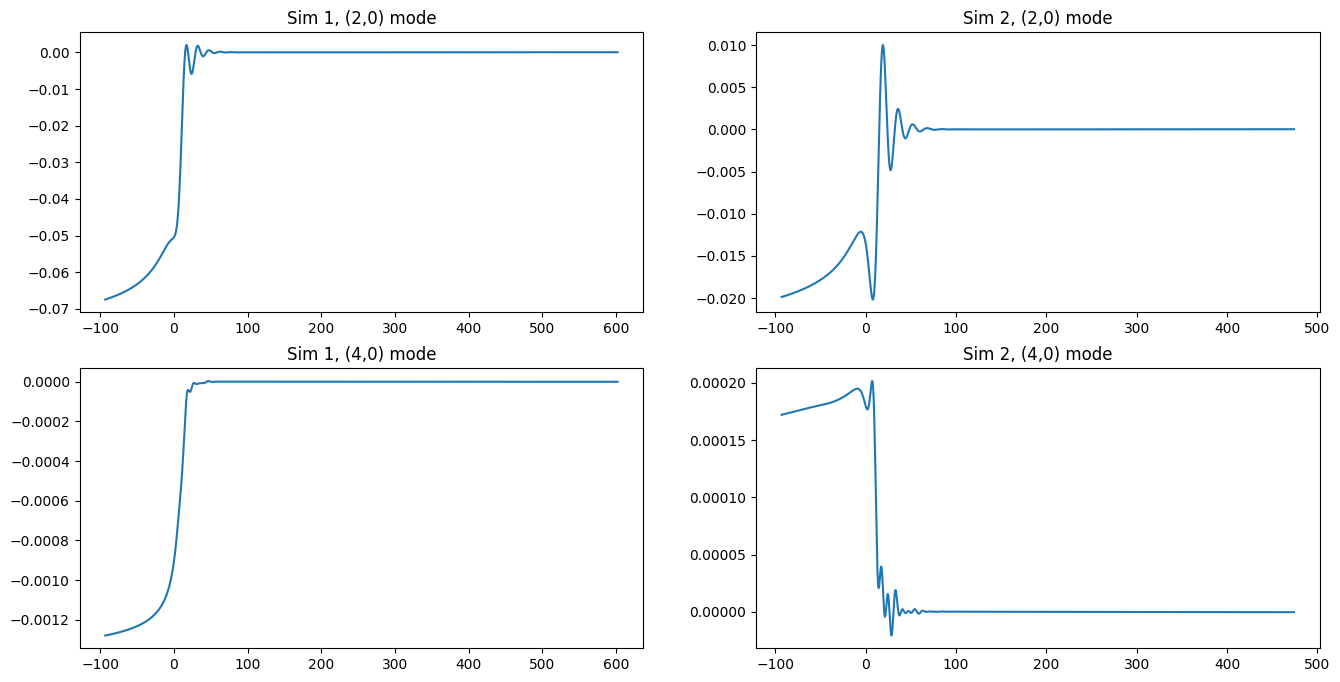

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,8)) 

ax[0,0].plot(sim1.times, sim1.h[2,0].real)
ax[0,1].plot(sim2.times, sim2.h[2,0].real)
ax[1,0].plot(sim1.times, sim1.h[4,0].real)
ax[1,1].plot(sim2.times, sim2.h[4,0].real)

ax[0,0].set_title('Sim 1, (2,0) mode')
ax[0,1].set_title('Sim 2, (2,0) mode')
ax[1,0].set_title('Sim 1, (4,0) mode')
ax[1,1].set_title('Sim 2, (4,0) mode')

fig.show() 

### Is the (2,0,0,1) mode present in the individual spherical modes?

In [5]:
sim = sim1

Mismatch = 8.213087815289732e-06


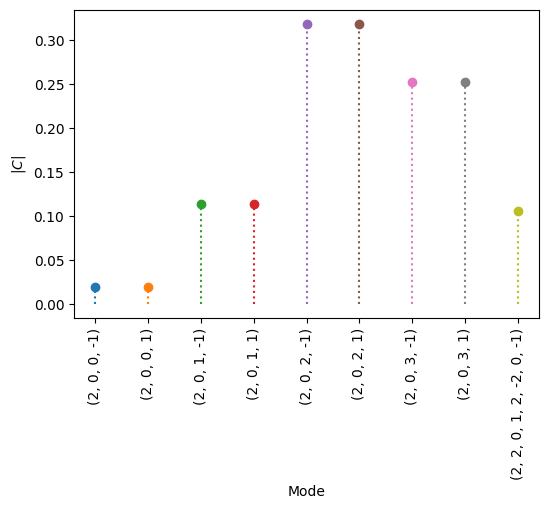

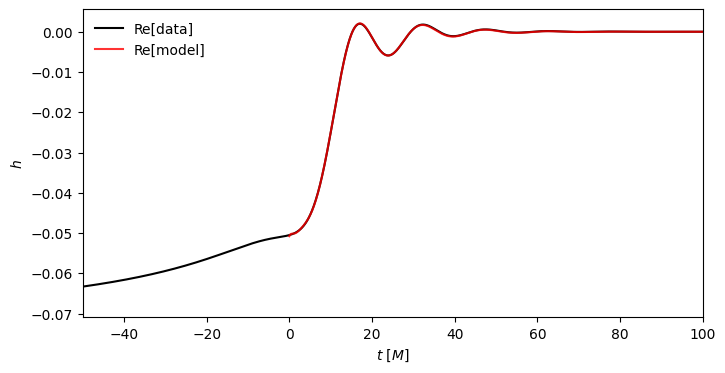

In [6]:
modes = [(2,0,n,p) for n in range(n_max+1) for p in [-1,1]] + [(2,2,0,1,2,-2,0,-1)]

spherical_mode = (2,0)
lp,mp = spherical_mode

best_fit = qnmfits.ringdown_fit(
    sim.times,
    sim.h[lp,mp],
    modes,
    Mf=sim.Mf,
    chif=sim.chif_mag,
    t0=0
)

print(f"Mismatch = {best_fit['mismatch']}")

qnmfits.plot_mode_amplitudes(
    best_fit['C'], best_fit['mode_labels'], log=False)

qnmfits.plot_ringdown(
    sim.times,
    sim.h[lp,mp],
    best_fit=best_fit
)

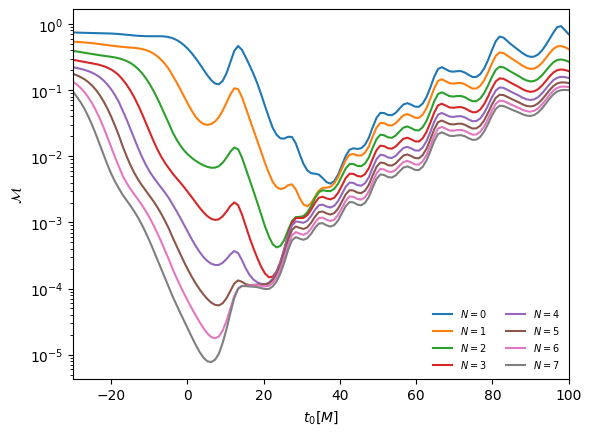

In [7]:
mode_list = [
    [(2,0,n,p) for p in [-1,1] for n in range(N)] for N in range(1,7+2)
]

spherical_modes = [(2,0)]

# The start times to use
t0_array = np.linspace(-30, 100, 130)

# Create figure
fig, ax = plt.subplots(dpi=100)

for modes in mode_list:
    
    # Create mismatch list
    mm_list = qnmfits.mismatch_t0_array(
        sim.times,
        sim.h,
        modes,
        Mf=sim.Mf,
        chif=sim.chif_mag,
        t0_array=t0_array,
        spherical_modes=spherical_modes
    )
    
    # Add to figure
    ax.semilogy(t0_array, mm_list, label=f'$N = {modes[-1][-2]}$')
    
# Plot limits and labels
ax.set_xlim(t0_array[0], t0_array[-1])
ax.set_xlabel('$t_0 [M]$')
ax.set_ylabel('$\mathcal{M}$')

_ = ax.legend(ncol=2, frameon=False, fontsize=7)

In [8]:
omega_fit_list_20 = []
omega_fit_list_30 = []
omega_fit_list_40 = []
t0_list = np.linspace(-20, 100, 120)

for t0 in t0_list:
    omega_fit_list_20.append(qnmfits.free_frequency_fit(
        sim.times, 
        sim.h[2,0], 
        t0=t0
    ))
    
for t0 in t0_list:
    omega_fit_list_30.append(qnmfits.free_frequency_fit(
        sim.times, 
        sim.h[3,0], 
        t0=t0
    ))

for t0 in t0_list:
    omega_fit_list_40.append(qnmfits.free_frequency_fit(
        sim.times, 
        sim.h[4,0], 
        t0=t0
    ))

omega_fit_list_20 = np.array(omega_fit_list_20)
omega_fit_list_30 = np.array(omega_fit_list_30)
omega_fit_list_40 = np.array(omega_fit_list_40)

omega_target = qnmfits.qnm.omega(2, 0, 0, 1, sim.chif_mag, sim.Mf)

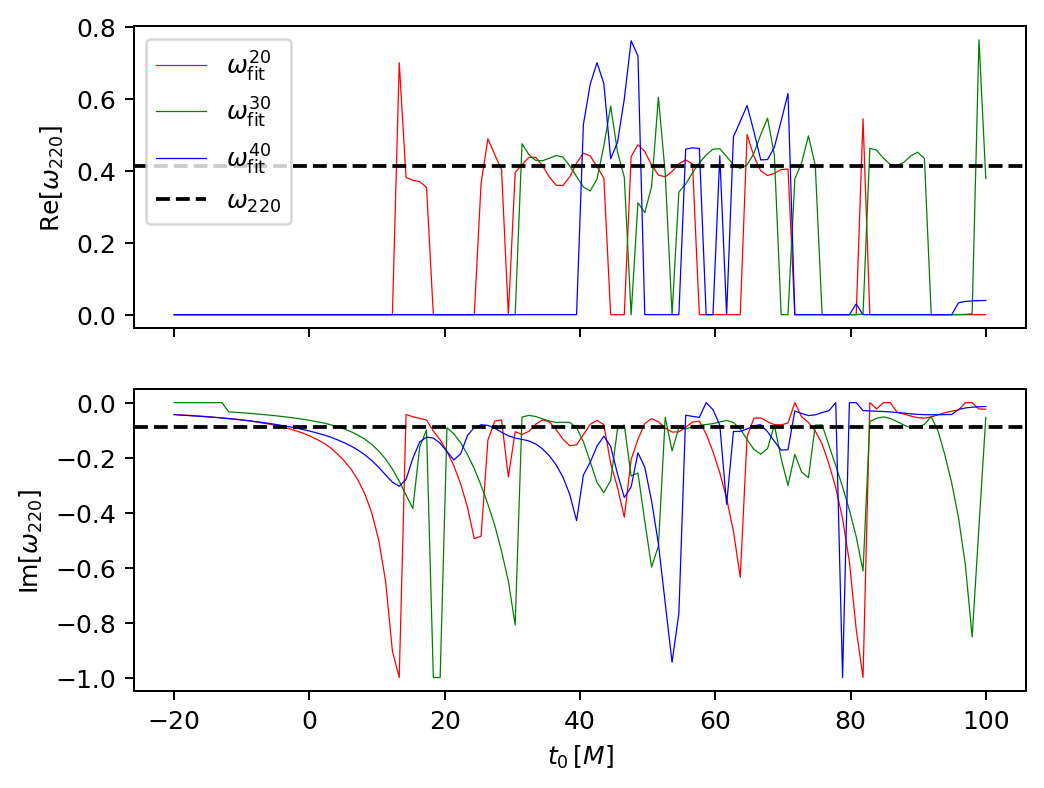

In [9]:
fig, axs = plt.subplots(2, 1, dpi=180, sharex=True)

axs[0].plot(t0_list, np.real(omega_fit_list_20), label='$\omega_\mathrm{fit}^{20}$', c='r', lw=0.5)
axs[0].plot(t0_list, np.real(omega_fit_list_30), label='$\omega_\mathrm{fit}^{30}$', c='g', lw=0.5)
axs[0].plot(t0_list, np.real(omega_fit_list_40), label='$\omega_\mathrm{fit}^{40}$', c='b', lw=0.5)
axs[0].axhline(np.real(omega_target), c='k', ls='--', label='$\omega_{220}$')

axs[1].plot(t0_list, np.imag(omega_fit_list_20), label = '20', c='r', lw=0.5)
axs[1].plot(t0_list, np.imag(omega_fit_list_30), label = '30', c='g', lw=0.5)
axs[1].plot(t0_list, np.imag(omega_fit_list_40), label = '40', c='b', lw=0.5)
axs[1].axhline(np.imag(omega_target), c='k', ls='--')

axs[1].set_xlabel('$t_0\, [M]$')
axs[0].set_ylabel('$\mathrm{Re}[\omega_{220}]$')
axs[1].set_ylabel('$\mathrm{Im}[\omega_{220}]$')

_ = axs[0].legend()

plus see video. 

### Mapping linear modes 

In [57]:
sim = CCE_to_sim_high_res(sim_num='0010')

In [58]:
lon = np.linspace(-np.pi, np.pi, 200)
lat = np.linspace(-np.pi/2, np.pi/2, 200)
Lon, Lat = np.meshgrid(lon, lat)

t_start = -50
t_end = 200
t_step = 1
times = np.arange(t_start, t_end, t_step)

mapping = [(2,0,0,1)]
map = mapping[0]
l,m,n,p = map

"""
QNMs = [(lam,mu,n,p) for lam in np.arange(2, l_max+1)
                        for mu in np.arange(-lam, lam+1)
                           for n in np.arange(0, n_max+1)
                              for p in (-1, +1)] """

QNMs = [(lam, 0, n, p) for lam in np.arange(2, l_max+1) for n in np.arange(0,n_max+1) for p in (-1, +1)]

spherical_modes = [(l,0) for l in np.arange(2, l_max+1)]

decay_time = qnmfits.qnm.omega(l,m,m,p, sim.chif_mag, Mf=sim.Mf).imag 

In [59]:
sm_list = []
amplitudes1 = [] 
amplitudes2 = []
amplitudes3 = []

sphindex1 = spherical_modes.index((2,0))
sphindex2 = spherical_modes.index((3,0))
sphindex3 = spherical_modes.index((4,0))

G = spheroidal(np.pi/2-Lat, Lon, map, l_max, sim.chif_mag)

for t0 in times:

   best_fit = qnmfits.mapping_multimode_ringdown_fit(sim.times, 
                                          sim.h, 
                                          modes=QNMs.copy(),
                                          Mf=sim.Mf,
                                          chif=sim.chif_mag,
                                          t0=t0,
                                          mapping_modes=mapping,
                                          spherical_modes=spherical_modes)

   F = mode_mapping(np.pi/2-Lat, Lon, best_fit, map, l_max)
   sm, arg, z = spatial_mismatch(F, G, num_points=100)
   sm_list.append(sm)

   amplitudes1.append(best_fit['C'][len(QNMs) + sphindex1 - 1])
   amplitudes2.append(best_fit['C'][len(QNMs) + sphindex2 - 1])
   amplitudes3.append(best_fit['C'][len(QNMs) + sphindex3 - 1])


In [60]:
mu20 = qnmfits.qnm.mu(2, 0, l, m, n, p, sim.chif_mag)
mu30 = qnmfits.qnm.mu(3, 0, l, m, n, p, sim.chif_mag)
mu40 = qnmfits.qnm.mu(4, 0, l, m, n, p, sim.chif_mag)

ratio1 = [abs(a / b) for a, b in zip(amplitudes1, amplitudes2)]
ratio2 = [abs(a / b) for a, b in zip(amplitudes1, amplitudes3)]

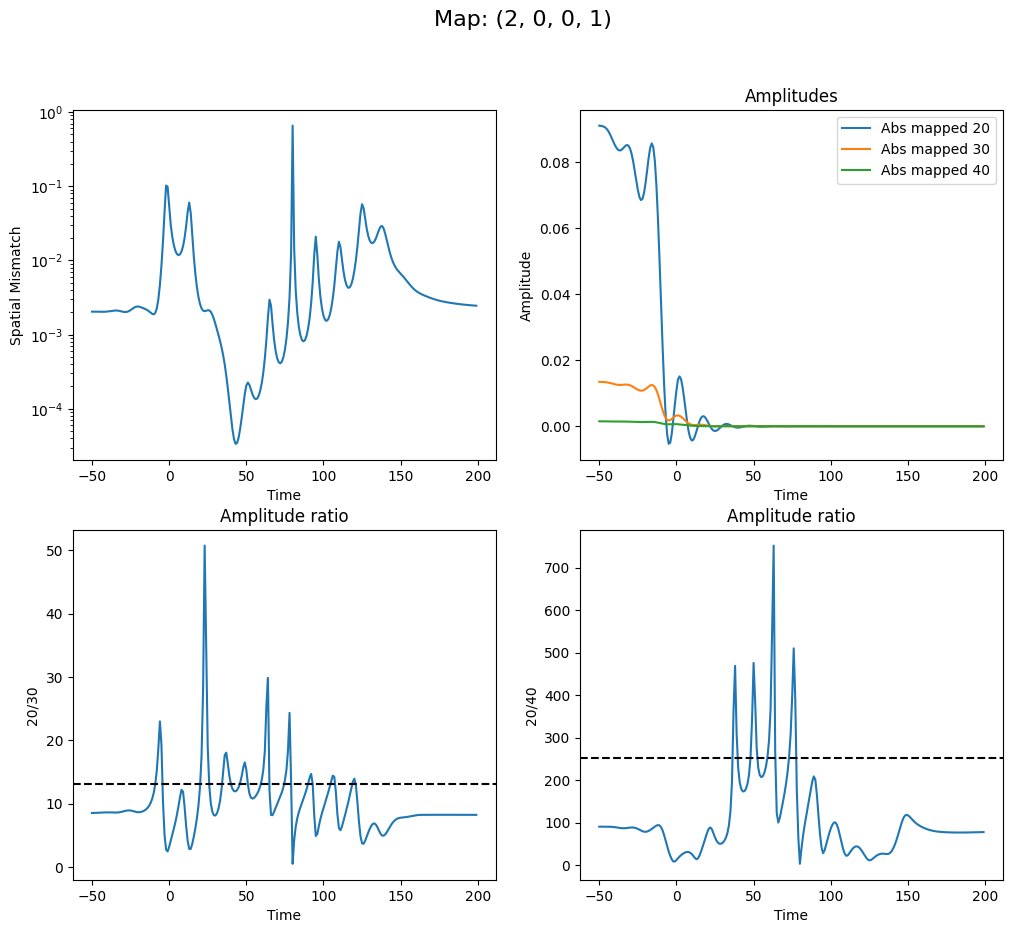

In [61]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

fig.suptitle(f"Map: {map}", fontsize=16)

axs[0,0].set_ylabel('Spatial Mismatch')
axs[0,0].set_xlabel('Time')
axs[0,0].plot(times, sm_list)

axs[0,0].set_yscale('log')

axs[0,1].set_title('Amplitudes')
axs[0,1].set_ylabel('Amplitude')
axs[0,1].set_xlabel('Time')
axs[0,1].plot(times, amplitudes1, label=f'Abs mapped 20')
axs[0,1].plot(times, amplitudes2, label=f'Abs mapped 30')
axs[0,1].plot(times, amplitudes3, label=f'Abs mapped 40')
axs[0,1].legend()

axs[1,0].set_title('Amplitude ratio')
axs[1,0].set_ylabel('20/30')
axs[1,0].set_xlabel('Time')
axs[1,0].plot(times, ratio1, label=f'Abs mapped 20/30')

axs[1,1].set_title('Amplitude ratio')
axs[1,1].set_ylabel('20/40')
axs[1,1].set_xlabel('Time')
axs[1,1].plot(times, ratio2, label=f'Abs mapped 20/40')

axs[1,0].axhline(y=abs(mu20/mu30), color='black', linestyle='--', label=f'Expected 20/40')
axs[1,1].axhline(y=abs(mu20/mu40), color='black', linestyle='--', label=f'Expected 20/40')


### Mapping quadratic modes

In [62]:
sim = sim1

In [63]:
lon = np.linspace(-np.pi, np.pi, 200)
lat = np.linspace(-np.pi/2, np.pi/2, 200)
Lon, Lat = np.meshgrid(lon, lat)

t_start = -50
t_end = 200
t_step = 1
times = np.arange(t_start, t_end, t_step)

mapping = [(2,2,0,1,2,-2,0,-1)]
map = mapping[0]
l1,m1,n1,p1,l2,m2,n2,p2 = map
lp = l1 + l2
mp = m1 + m2

"""
QNMs = [(lam,mu,n,p) for lam in np.arange(2, l_max+1)
                        for mu in np.arange(-lam, lam+1)
                           for n in np.arange(0, n_max+1)
                              for p in (-1, +1)]
"""

QNMs = [(lam, 0, n, p) for lam in np.arange(2, l_max+1) for n in np.arange(0,n_max+1) for p in (-1, +1)]

spherical_modes = [(l,0) for l in np.arange(2, l_max+1)]

In [64]:
sm_list = []
amplitudes1 = [] 
amplitudes2 = []
amplitudes3 = []

sphindex1 = spherical_modes.index((2,0))
sphindex2 = spherical_modes.index((3,0))
sphindex3 = spherical_modes.index((4,0))

# TODO - change to alpha/noalpha
G = spheroidal(np.pi/2-Lat, Lon, map, l_max, sim.chif_mag)

for t0 in times:

   best_fit = qnmfits.mapping_multimode_ringdown_fit(sim.times, 
                                          sim.h, 
                                          modes=QNMs.copy(),
                                          Mf=sim.Mf,
                                          chif=sim.chif_mag,
                                          t0=t0,
                                          mapping_modes=mapping,
                                          spherical_modes=spherical_modes)

   F = mode_mapping(np.pi/2-Lat, Lon, best_fit, map, l_max)
   sm, arg, z = spatial_mismatch(F, G, num_points=100)
   sm_list.append(sm)

   amplitudes1.append(best_fit['C'][len(QNMs) + sphindex1])
   amplitudes2.append(best_fit['C'][len(QNMs) + sphindex2])
   amplitudes3.append(best_fit['C'][len(QNMs) + sphindex3])

In [ ]:
mu20 = qnmfits.qnm.alpha([(2,0)+map], sim.chif_mag)[0]
mu30 = qnmfits.qnm.alpha([(3,0)+map], sim.chif_mag)[0]
mu40 = qnmfits.qnm.alpha([(4,0)+map], sim.chif_mag)[0]

ratio1 = [abs(a / b) for a, b in zip(amplitudes1, amplitudes2)]
ratio2 = [abs(a / b) for a, b in zip(amplitudes1, amplitudes3)]

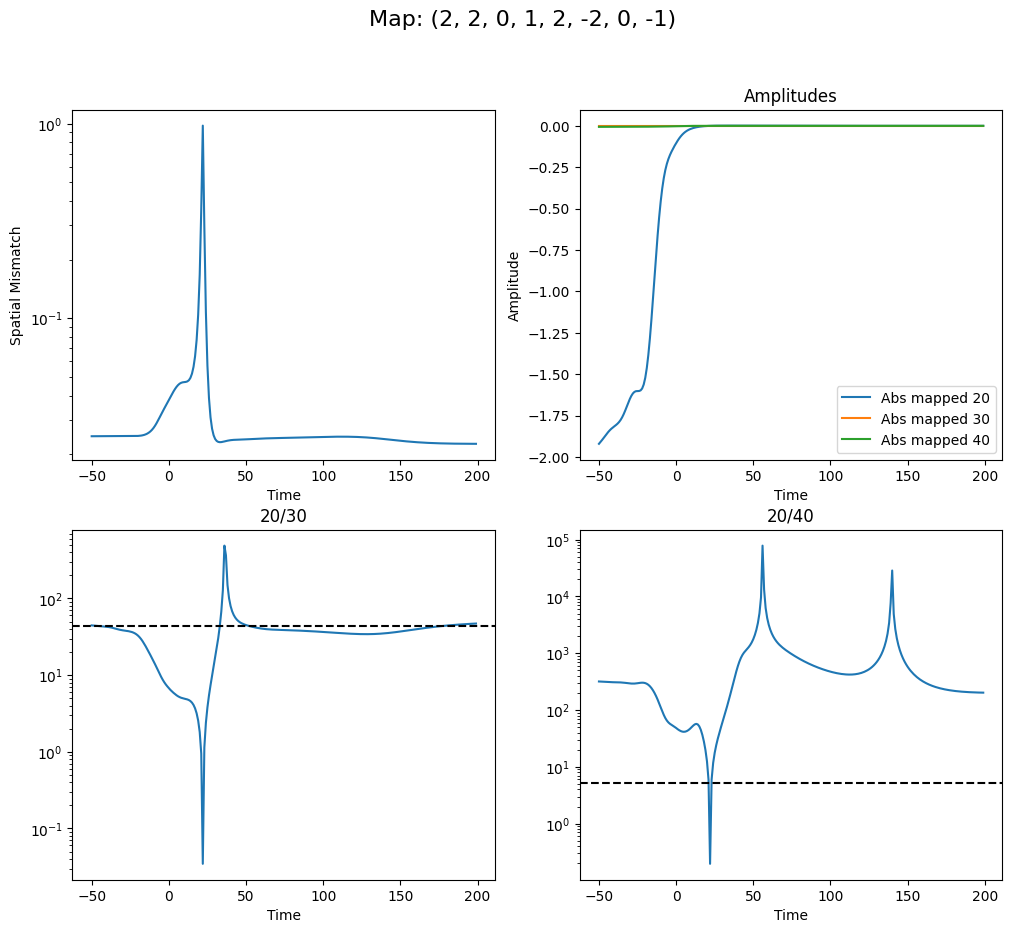

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

fig.suptitle(f"Map: {map}", fontsize=16)

axs[0,0].set_ylabel('Spatial Mismatch')
axs[0,0].set_xlabel('Time')
axs[0,0].plot(times, sm_list)

axs[0,0].set_yscale('log')

axs[0,1].set_title('Amplitudes')
axs[0,1].set_ylabel('Amplitude')
axs[0,1].set_xlabel('Time')
axs[0,1].plot(times, amplitudes1, label=f'Abs mapped 20')
axs[0,1].plot(times, amplitudes2, label=f'Abs mapped 30')
axs[0,1].plot(times, amplitudes3, label=f'Abs mapped 40')
axs[0,1].legend()

axs[1,0].set_title('20/30')
axs[1,0].set_xlabel('Time')
axs[1,0].plot(times, ratio1, label=f'Abs mapped 20/30')

axs[1,1].set_title('20/40')
axs[1,1].set_xlabel('Time')
axs[1,1].plot(times, ratio2, label=f'Abs mapped 20/40')

axs[1,0].axhline(y=abs(mu20/mu30), color='black', linestyle='--', label=f'Expected 20/40')
axs[1,1].axhline(y=abs(mu20/mu40), color='black', linestyle='--', label=f'Expected 20/40')

axs[1,0].set_yscale('log')
axs[1,1].set_yscale('log')